# Task content:

# What makes an employee want to stay with their current employer? Try to predict whether the employee will leave or not.

**Explanation of part of the data:**

**Education**
1.   'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'
**EnvironmentSatisfaction**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'
**JobInvolvement**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'
**JobSatisfaction**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'
**PerformanceRating**
1. 'Low'
2. 'Good'
3. 'Excellent'
4. 'Outstanding'
**RelationshipSatisfaction**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'
**WorkLifeBalance**
1. 'Bad'
2. 'Good'
3. 'Better'
4. 'Best'

**EmployeeCount**
* The number of people represented by the entry.

**Monthly Rate a Monthly income**
* The amount the employer pays for an employee.
**DailyRate**
* Similarly to before.

**Attrition**
* Information about whether an employee quit their job or not.

**STOCK OPTIONS LEVEL***
* What percentage of shares the employee owns/can hold.

**PERCENT SALARY HIKE***
* Percentage increase in salary over the last 2 years.

# 1. Data preparation

## 1.1. Instaling Libraries

In [2]:
! pip install lazypredict

## 1.2. Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import learning_curve

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate, RandomizedSearchCV

from sklearn.preprocessing import LabelBinarizer

In [4]:
SEED = 42

## 1.3. Loading Dataset

In [5]:
# defining a data frame
df_1 = pd.read_csv('/content/df_1.csv',index_col=0)
df_2 = pd.read_csv('/content/df_2.csv',index_col=0)
target = pd.read_csv('/content/target.csv',index_col=0)

# 2. Exploratory Data Analysis (EDA)





In [6]:
df_1.head() # return the first 5 rows

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,104,30.00,Travel_Rarely,852.00,Research & Development,1.00,1.00,Life Sciences,1.00,4.00,Male,55.00,2.00,2.00,Laboratory Technician,4.00,Married,5126.00,15998.00,1.00
1,1638,38.00,Travel_Rarely,397.00,Research & Development,2.00,2.00,Medical,1.00,4.00,Female,54.00,2.00,3.00,Manufacturing Director,3.00,Married,7756.00,14199.00,3.00
2,164,26.00,Travel_Rarely,841.00,Research & Development,6.00,3.00,Other,1.00,3.00,Female,46.00,2.00,1.00,Research Scientist,2.00,Married,2368.00,23300.00,1.00
3,395,28.00,Travel_Rarely,1117.00,Research & Development,8.00,2.00,Life Sciences,1.00,4.00,Female,66.00,3.00,1.00,Research Scientist,4.00,Single,3310.00,4488.00,1.00
4,53,35.00,Travel_Rarely,464.00,Research & Development,4.00,2.00,Other,1.00,3.00,Male,75.00,3.00,1.00,Laboratory Technician,4.00,Divorced,1951.00,10910.00,1.00


In [7]:
df_2.head()  # return the first 5 rows

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
0,104,Y,Yes,12.00,3.00,3.00,80.00,2.00,10.00,1.00,2.00,10.00,8.00,3.00,0.00,61512.00
1,1638,Y,Yes,19.00,3.00,4.00,80.00,1.00,10.00,6.00,4.00,5.00,4.00,0.00,2.00,93072.00
2,164,Y,No,19.00,3.00,3.00,80.00,0.00,5.00,3.00,2.00,5.00,4.00,4.00,3.00,28416.00
3,395,Y,No,21.00,4.00,4.00,80.00,0.00,5.00,3.00,3.00,5.00,3.00,0.00,2.00,39720.00
4,53,Y,No,12.00,3.00,3.00,80.00,1.00,1.00,3.00,3.00,1.00,0.00,0.00,0.00,23412.00


In [8]:
target.head()  # return the first 5 rows

,EmployeeNumber,Attrition
0,104,No
1,1638,No
2,164,No
3,395,No
4,53,No


In [9]:
# join tables based on EmployeeNumber
df = df_1.merge(df_2, on = "EmployeeNumber", how = "inner").merge(target, on = "EmployeeNumber", how = "inner")

In [10]:
# return the first 5 rows
df.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,Attrition
0,104,30.00,Travel_Rarely,852.00,Research & Development,1.00,1.00,Life Sciences,1.00,4.00,...,2.00,10.00,1.00,2.00,10.00,8.00,3.00,0.00,61512.00,No
1,1638,38.00,Travel_Rarely,397.00,Research & Development,2.00,2.00,Medical,1.00,4.00,...,1.00,10.00,6.00,4.00,5.00,4.00,0.00,2.00,93072.00,No
2,164,26.00,Travel_Rarely,841.00,Research & Development,6.00,3.00,Other,1.00,3.00,...,0.00,5.00,3.00,2.00,5.00,4.00,4.00,3.00,28416.00,No
3,395,28.00,Travel_Rarely,1117.00,Research & Development,8.00,2.00,Life Sciences,1.00,4.00,...,0.00,5.00,3.00,3.00,5.00,3.00,0.00,2.00,39720.00,No
4,53,35.00,Travel_Rarely,464.00,Research & Development,4.00,2.00,Other,1.00,3.00,...,1.00,1.00,3.00,3.00,1.00,0.00,0.00,0.00,23412.00,No


In [11]:
# return the last 5 rows, for verification, to make sure that the data has been correctly loaded and processed
df.tail()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,Attrition
4297,7975,8823.00,Travel_Rarely,621.00,Research & Development,15.00,3.00,Medical,1.00,1.00,...,1.00,10.00,2.00,3.00,10.00,7.00,0.00,5.00,95736.00,Yes
4298,7976,8823.00,Travel_Rarely,621.00,Research & Development,15.00,3.00,Medical,1.00,1.00,...,1.00,10.00,2.00,3.00,10.00,7.00,0.00,5.00,95736.00,Yes
4299,7977,44.00,Non-Travel,381.00,Research & Development,918785.00,3.00,Medical,1.00,1.00,...,0.00,9.00,5.00,3.00,5.00,2.00,1.00,4.00,44496.00,Yes
4300,7978,44.00,Non-Travel,381.00,Research & Development,918785.00,3.00,Medical,1.00,1.00,...,0.00,9.00,5.00,3.00,5.00,2.00,1.00,4.00,44496.00,Yes
4301,7979,44.00,Non-Travel,381.00,Research & Development,918785.00,3.00,Medical,1.00,1.00,...,0.00,9.00,5.00,3.00,5.00,2.00,1.00,4.00,44496.00,Yes


In [12]:
# get the number of rows (4302) and the number of columns (36)
df.shape

(4302, 36)

In [13]:
# returns the number of elements in the DataFrame.
df.size

154872

In [14]:
# view the name of the column
df.columns

Index(['EmployeeNumber', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'YearlyIncome', 'Attrition'],
      dtype='object')

In [15]:
# prints information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4302 entries, 0 to 4301
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4302 non-null   int64  
 1   Age                       4302 non-null   float64
 2   BusinessTravel            4302 non-null   object 
 3   DailyRate                 4302 non-null   float64
 4   Department                4302 non-null   object 
 5   DistanceFromHome          4302 non-null   float64
 6   Education                 4302 non-null   float64
 7   EducationField            4302 non-null   object 
 8   EmployeeCount             4302 non-null   float64
 9   EnvironmentSatisfaction   4302 non-null   float64
 10  Gender                    4302 non-null   object 
 11  HourlyRate                4302 non-null   float64
 12  JobInvolvement            4302 non-null   float64
 13  JobLevel                  4302 non-null   float64
 14  JobRole 

DataFrame contains 36 columns, 9 categorical, 27 numerical, lack of missing values

In [16]:
# checking missing values as above
df.isnull().sum()

EmployeeNumber              0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

As befor - visible lack of missing values

In [17]:
# duplicate checking
df.duplicated().sum()

0

Lack of duplicate values

# 3. Basic Data Cleaning

## 3.1. Checking the number of unique values in the dataframe

In [18]:
def annotate_plot(plots): # defining formats barplot
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0, 8),
                       textcoords='offset points')

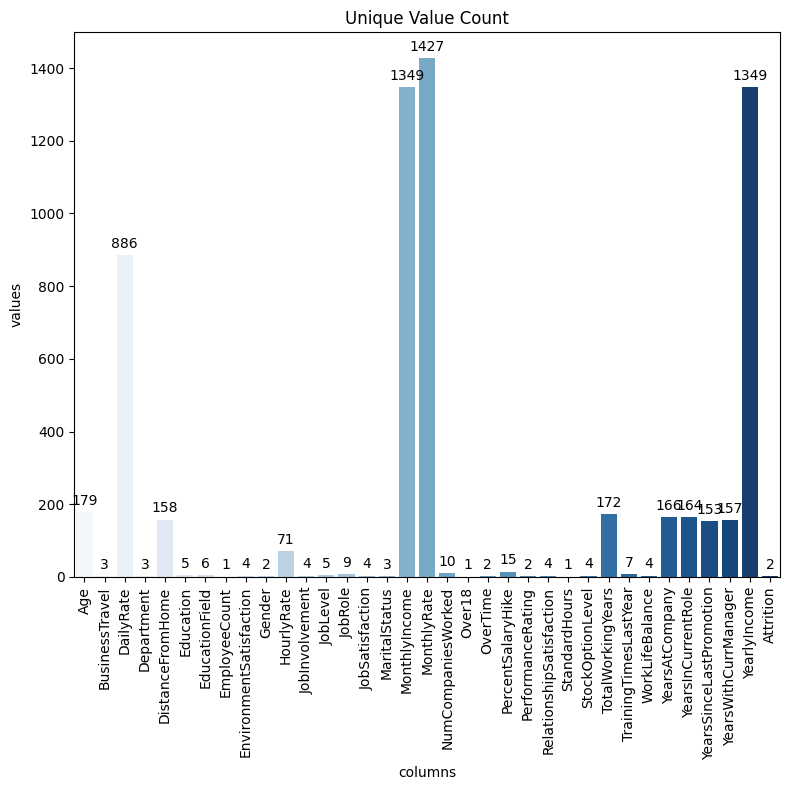

In [19]:
# creating a barplot of unique values and their quantity
plt.figure(figsize=(8,8))
unique_df = pd.DataFrame(df.apply(lambda x: x.nunique()))
unique_df.drop("EmployeeNumber",inplace =True)
unique_df = unique_df.reset_index()
unique_df.columns = ["columns","values"]
g = sns.barplot(x="columns",data = unique_df, y= "values", palette = 'Blues' )
annotate_plot(g)
plt.xticks(rotation=90)
plt.title("Unique Value Count")
plt.tight_layout()
plt.show()

Remove columns with one value - StandardHours, Over18, EmployeeCount

In [20]:
# drop unnecessary column with one value and and not needed for modelling
df.drop(['StandardHours','Over18', 'EmployeeCount'],axis = 1,inplace = True)

# 4. Data Visualization

Numerical columns:

In [21]:
num = df.select_dtypes(include=np.number).columns.tolist() #  selects the numerical columns

print('No. of numerical columns are:',len(num))

No. of numerical columns are: 25


Categorical columns:

In [22]:
cat = np.array(df.columns)[~np.isin(np.array(df.columns), num)]

print('No. of categorical columns are:',len(cat))

No. of categorical columns are: 8


## 4.1. Exploring Categorical Columns/Features
 Checking the number of unique values for each text column

In [23]:
cat # categorical columns name

array(['BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime', 'Attrition'], dtype=object)

In [24]:
df['BusinessTravel'].value_counts()

Travel_Rarely        3041
Travel_Frequently     816
Non-Travel            445
Name: BusinessTravel, dtype: int64

In [25]:
df['Department'].value_counts()

Research & Development    2815
Sales                     1305
Human Resources            182
Name: Department, dtype: int64

In [26]:
df['EducationField'].value_counts()

Life Sciences       1768
Medical             1344
Marketing            472
Technical Degree     393
Other                245
Human Resources       80
Name: EducationField, dtype: int64

In [27]:
df['Gender'].value_counts()

Male      2595
Female    1707
Name: Gender, dtype: int64

In [28]:
df['JobRole'].value_counts()

Sales Executive              950
Research Scientist           883
Laboratory Technician        755
Manufacturing Director       417
Healthcare Representative    384
Manager                      287
Sales Representative         247
Research Director            229
Human Resources              150
Name: JobRole, dtype: int64

In [29]:
df['MaritalStatus'].value_counts()

Married     2005
Single      1381
Divorced     916
Name: MaritalStatus, dtype: int64

In [30]:
df['OverTime'].value_counts()

No     3089
Yes    1213
Name: OverTime, dtype: int64

In [31]:
df['Attrition'].value_counts()

Yes    2222
No     2080
Name: Attrition, dtype: int64

## 4.2. Exploring Numerical/Float variables

### 4.2.1. Create correlation map
* positive correlation - it can be said when the values of two variables change in the same direction. So if one grows, the other behaves the same way.
* negative correlation - in this case, the situation is quite different. A negative correlation means that the values of interdependent variables change in opposite directions. So if one value goes up, the other goes down, and vice versa.
* lack of correlation is a situation in which phenomena, features, and properties have no connection with themselves.

<Axes: >

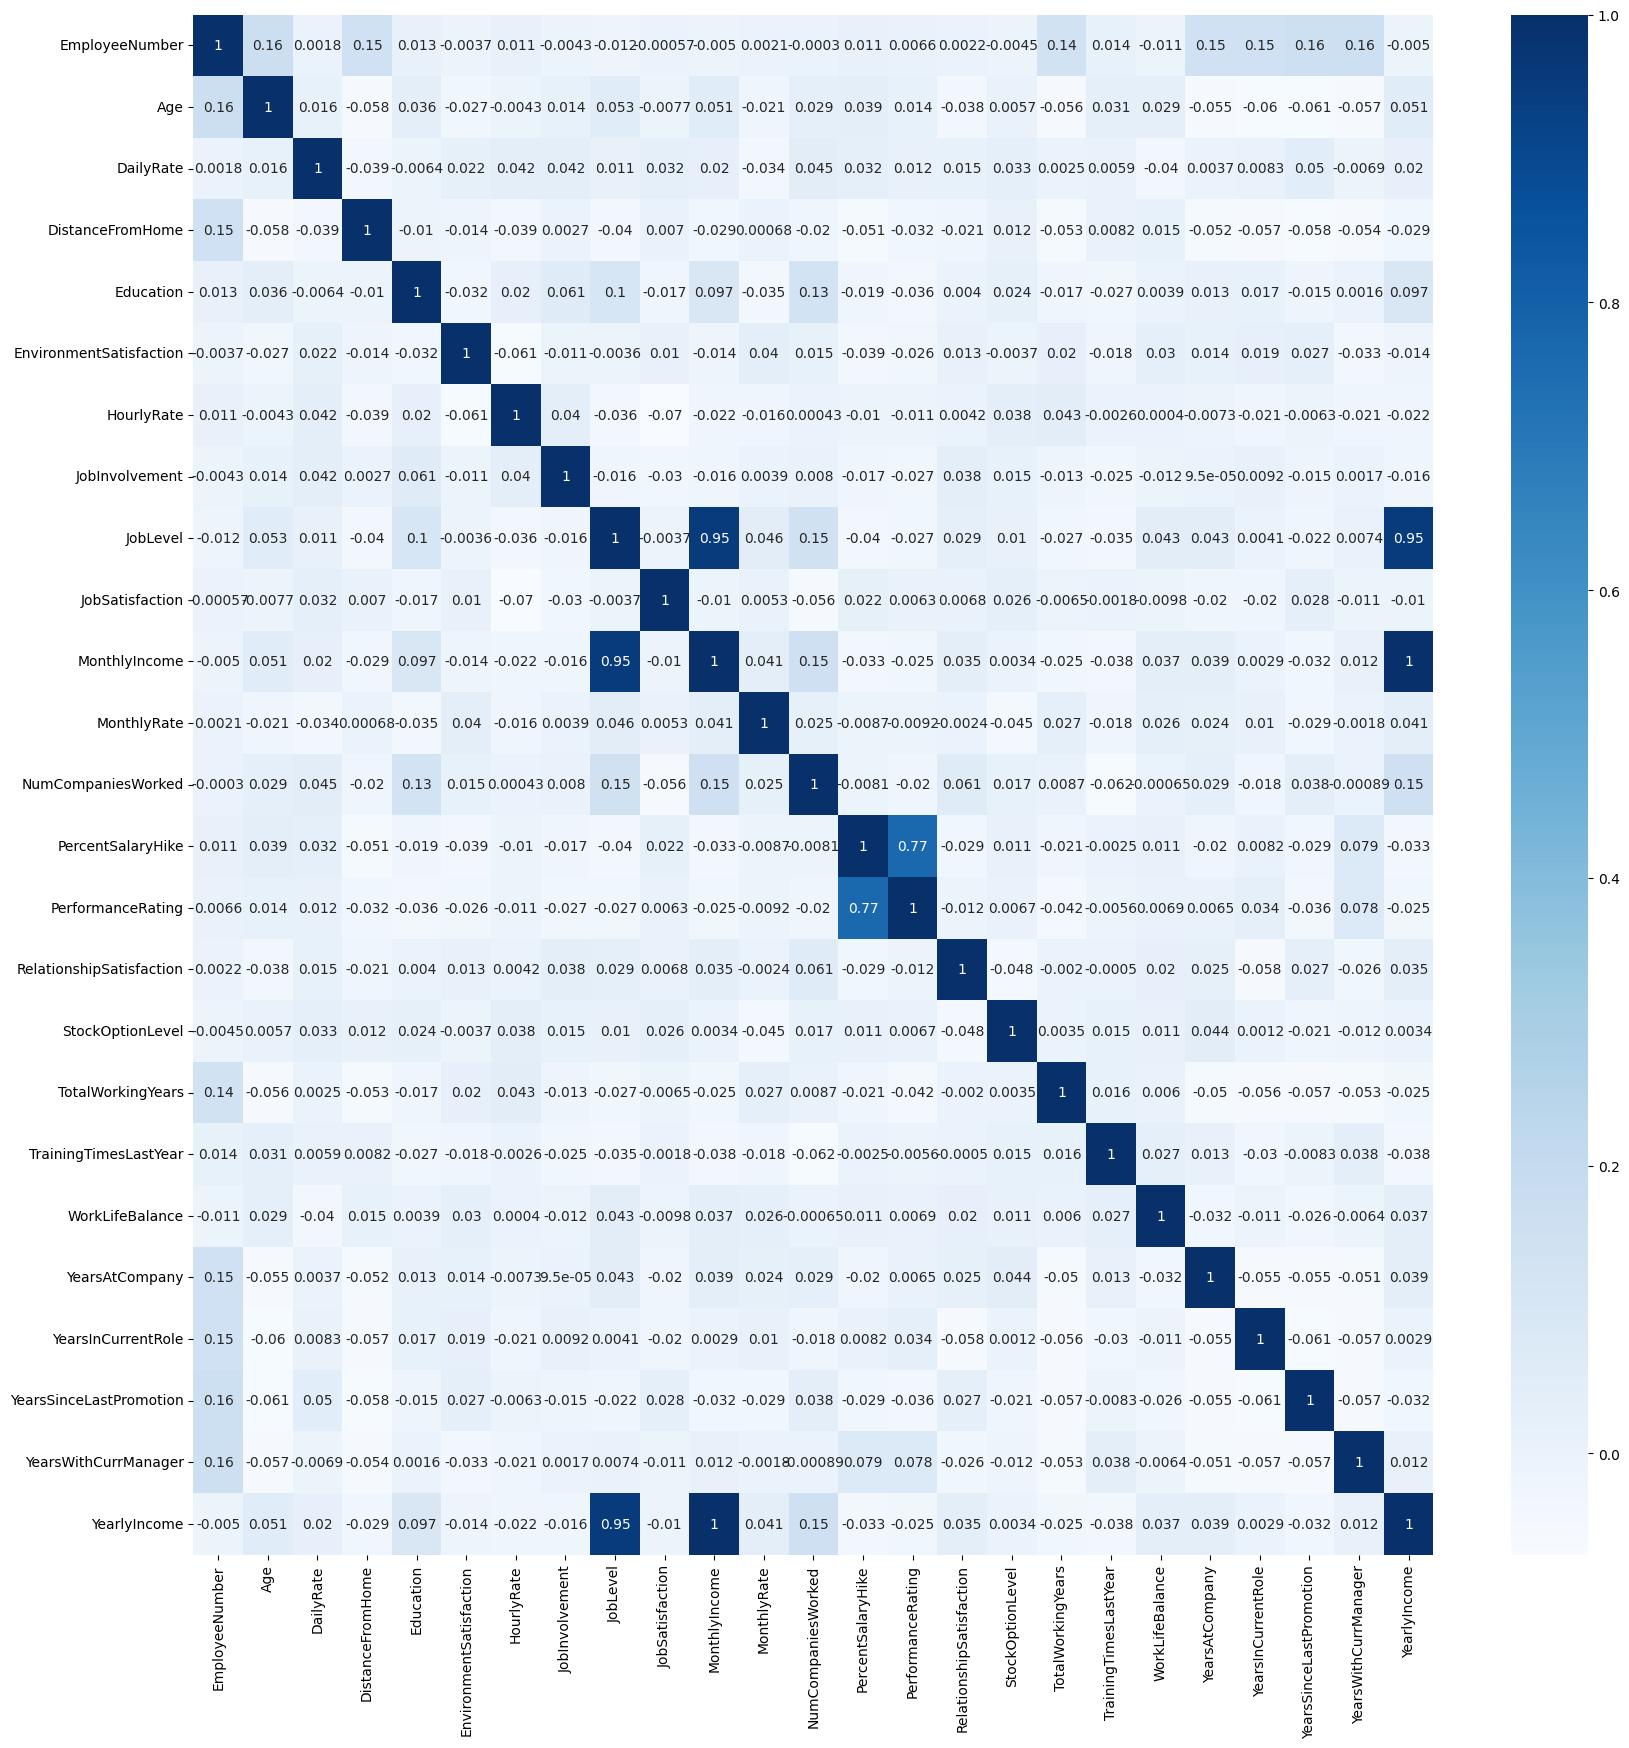

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

Observation: YearlyIncome and JobLevel is too correlated with the MonthlyIncome, so it needs to be removed.

In [33]:
# drop too correlated columns
df.drop(['YearlyIncome','JobLevel'],axis = 1,inplace = True)

In [34]:
# generate descriptive statistics
df.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,4302.00,4302.00,4302.00,4302.00,4302.00,4302.00,4302.00,4302.00,4302.00,4302.00,...,4302.00,4302.00,4302.00,4302.00,4302.00,4302.00,4302.00,4302.00,4302.00,4302.00
mean,4809.24,429.12,800.84,34478.31,2.91,2.72,66.04,2.74,2.72,6453.27,...,3.15,2.73,0.79,354.00,2.80,2.77,312.85,367.11,399.00,334.77
std,2643.04,1591.15,405.66,147682.32,1.03,1.09,20.30,0.71,1.11,4672.99,...,0.35,1.08,0.85,1508.02,1.30,0.71,1374.00,1480.11,1597.94,1431.99
min,1.00,18.00,102.00,1.00,1.00,1.00,30.00,1.00,1.00,1009.00,...,3.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,1680.25,31.00,457.00,2.00,2.00,2.00,48.00,2.00,2.00,2897.00,...,3.00,2.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,5828.50,36.00,804.00,8.00,3.00,3.00,66.00,3.00,3.00,4876.00,...,3.00,3.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,6903.75,45.00,1162.00,17.00,4.00,4.00,84.00,3.00,4.00,8307.75,...,3.00,4.00,1.00,17.00,3.00,3.00,10.00,7.00,4.00,7.00
max,7979.00,9890.00,1499.00,999590.00,5.00,4.00,100.00,4.00,4.00,19999.00,...,4.00,4.00,3.00,9939.00,6.00,4.00,9984.00,9937.00,9990.00,9882.00


Incorrect values for age and years of work sections will be corrected below

### 4.2.2. Generates histograms for each numerical column in the DataFrame `df`.
The histograms are displayed in a grid layout with a figure size of (16, 20).
The `bins` parameter specifies the number of bins to use for each histogram. The `xlabelsize` and `ylabelsize`

array([[<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>],
       [<Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>],
       [<Axes: title={'center': 'StockOptionLevel'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>,
        <Axes: title={'center': 'TrainingTimesLastYear'}>,
        <Axes: title={'center': 'WorkLifeBalan

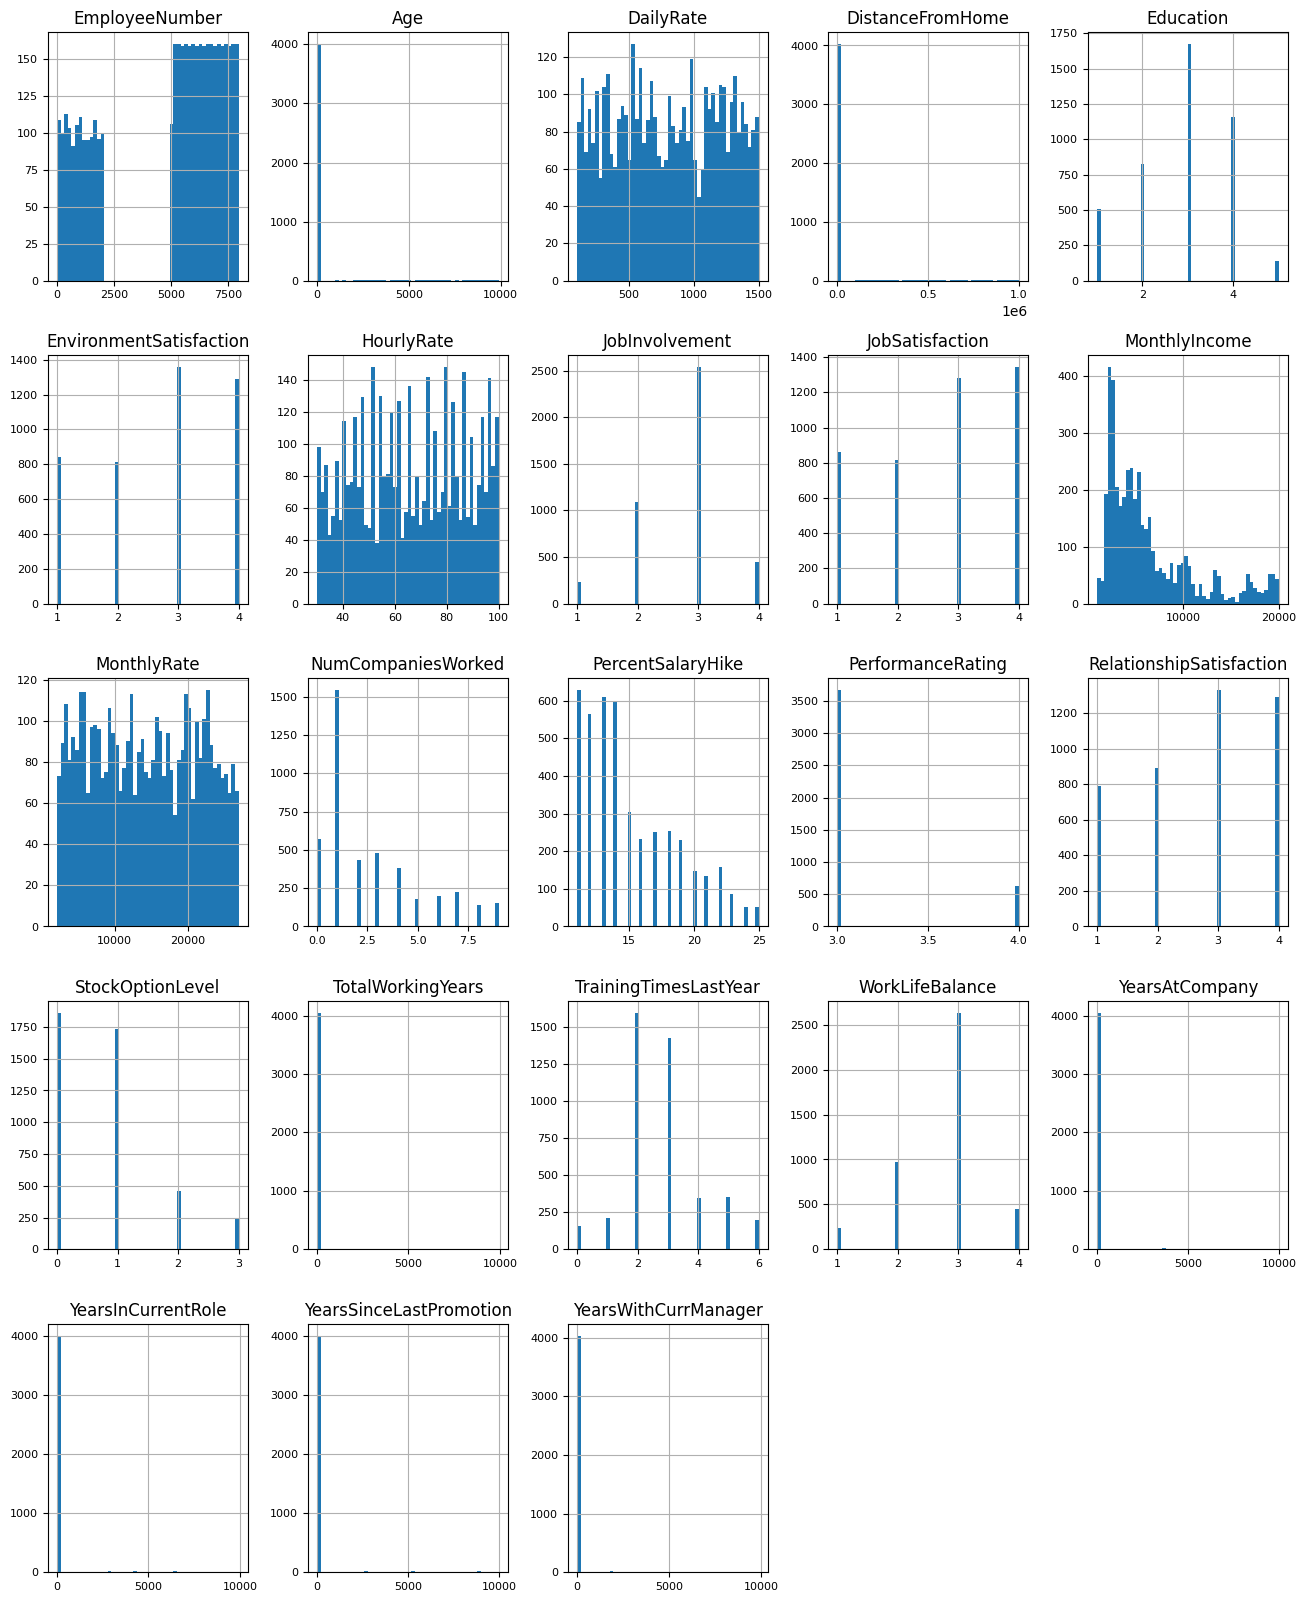

In [35]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Obseravtion: Age, DistanceFromHome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion,YearsWithCurrManager have outliers. The values will be checked further below

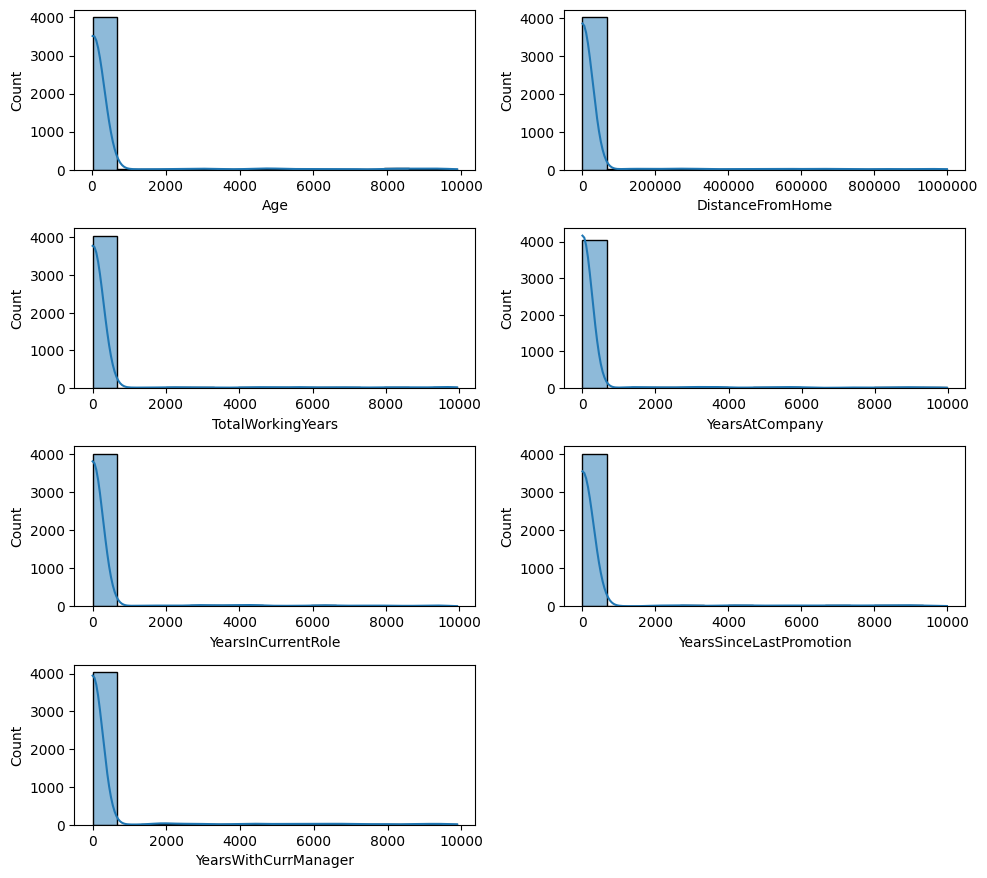

In [36]:
# checking the values with outliers.

column_names = ["Age", "DistanceFromHome", "TotalWorkingYears", "YearsAtCompany",
                "YearsInCurrentRole", "YearsSinceLastPromotion","YearsWithCurrManager"]

def plot_histograms(df, columns, bins=15):
    plt.figure(figsize=(10, 15))

    for i, column in enumerate(columns, start=1):
        plt.subplot(len(columns), 2, i)
        sns.histplot(data=df, x=column, bins=bins, kde=True)
        plt.ticklabel_format(style='plain')


    plt.tight_layout()
    plt.show()

plot_histograms(df, column_names)

Observation: Based on the bar, we can deduce when the wrong values start, we will filter them below

In [37]:
# disregarding outliers
df = df.loc[
    (df["Age"] < 90) # abstractly, we will note that you work until the age of 90
    & (df["TotalWorkingYears"] < 100)  # average working years is 40, we will add 10 years
    & (df["YearsAtCompany"] < 50) # abstractly, assume that someone worked in only one company
    & (df["YearsInCurrentRole"] < 50) # abstractly, we assume that someone only worked in one position
    & (df["YearsSinceLastPromotion"] < 50) # as above
    & (df["YearsWithCurrManager"] < 50) # as above
    & (df["DistanceFromHome"] < 50000)] # abstractly, we assume that max distance < 50000

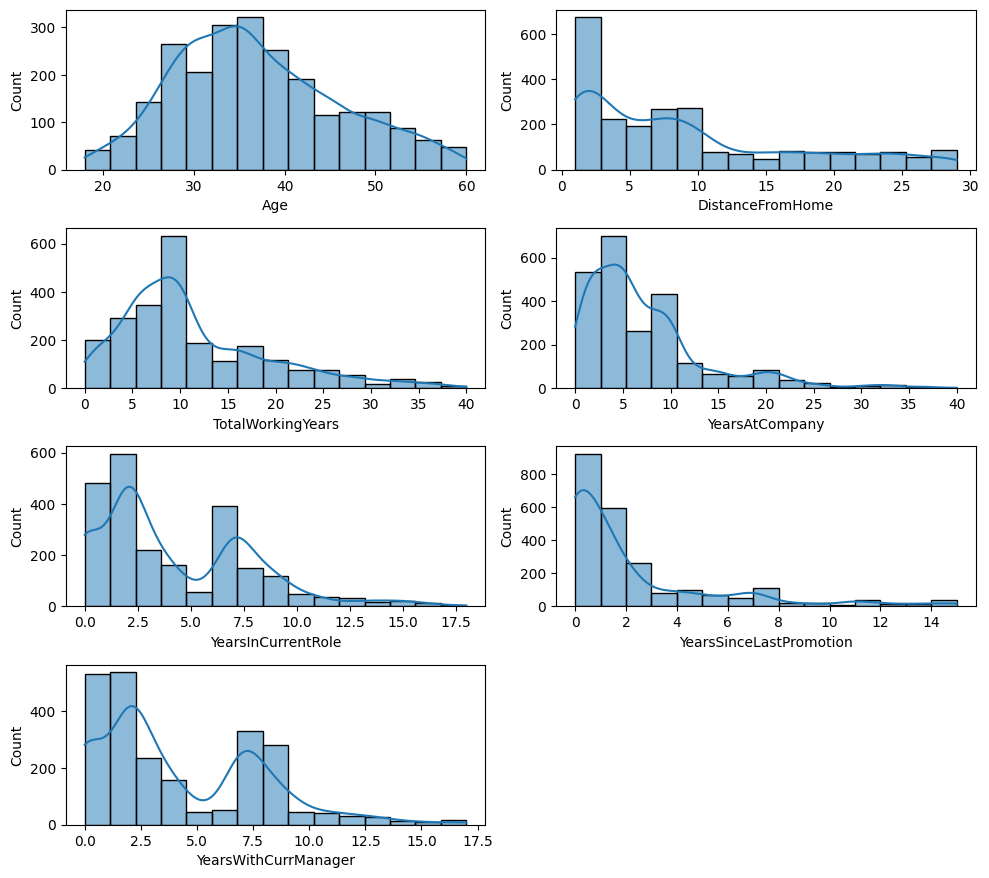

In [38]:
# checking the values without outliers.

def plot_histograms(df, columns, bins=15):
    plt.figure(figsize=(10, 15))

    for i, column in enumerate(columns, start=1):
        plt.subplot(len(columns), 2, i)
        sns.histplot(data=df, x=column, bins=bins, kde=True)
        plt.ticklabel_format(style='plain')


    plt.tight_layout()
    plt.show()

plot_histograms(df, column_names)

Observation: The column values look correct

### 4.2.3. Examine the values more closely by creating a detailed boxplot for MonthlyIncome and TotalWorkingYears using seaborn.

In [39]:
def remove_outliers(df, column_name, threshold):
    # Remove values greater than 'threshold'
    df = df[df[column_name] <= threshold]
    return df

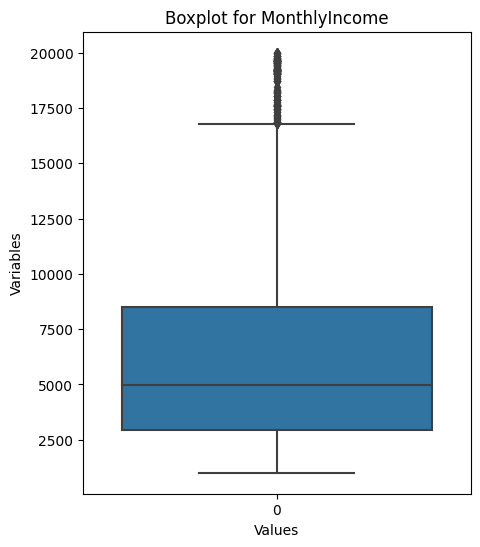

In [40]:
# Creating a boxplot for MonthlyIncome using seaborn
plt.figure(figsize=(5, 6))
sns.boxplot(data=df['MonthlyIncome'], orient='v')
plt.title('Boxplot for MonthlyIncome')
plt.xlabel('Values')
plt.ylabel('Variables')
plt.show()

Obseravtion:Outliers are above 16000, we will remove them

In [41]:
# Remove values greater than 16,000 from the 'MonthlyIncome' column
df_ = remove_outliers(df, 'MonthlyIncome', 16000)

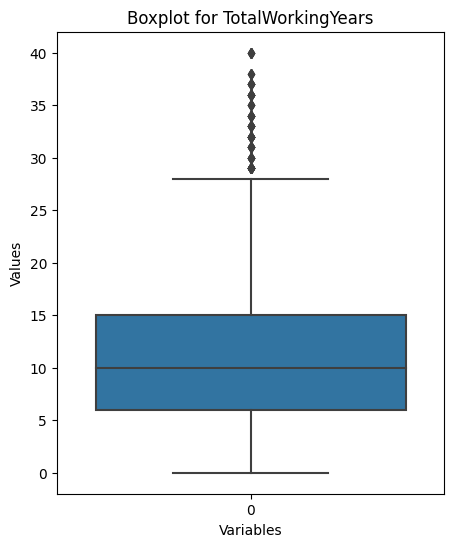

In [42]:
# Creating a boxplot for TotalWorkingYears using seaborn
plt.figure(figsize=(5, 6))
sns.boxplot(data=df['TotalWorkingYears'], orient='v')
plt.title('Boxplot for TotalWorkingYears')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

Observation: Outlier values are visible, they are possible values however, we will remove data above the 95th percentile.


In [43]:
percentile_threshold = np.percentile(df['TotalWorkingYears'], 95)
df = df[df['TotalWorkingYears'] <= percentile_threshold]

### 4.2.4. Data visualization per target variable.


#### Creates a line plot using Seaborn to visualize the relationship between 'Age' and 'MonthlyIncome' while distinguishing the lines by the 'Attrition' variable.

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

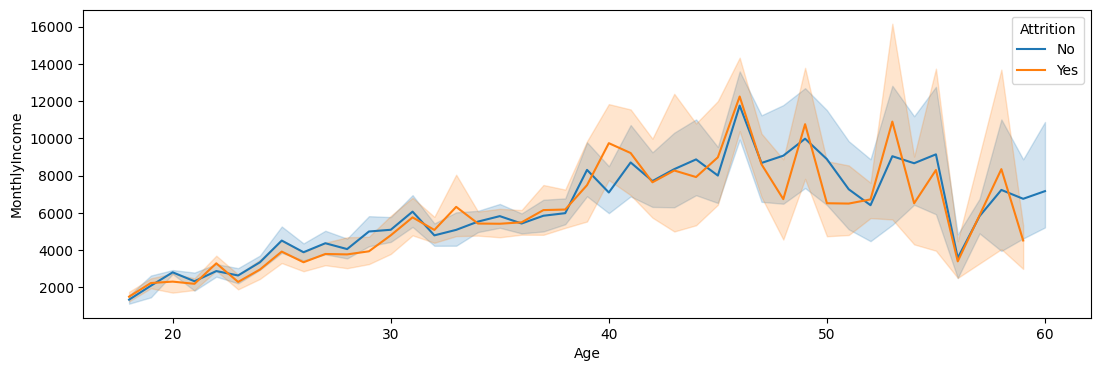

In [44]:
plt.figure(figsize=(13,4))
sns.lineplot(data=df,x='Age',y='MonthlyIncome',hue="Attrition")

Observation:
* With age and lower monthly income, the number of attrition increases
* Middle-aged people, despite better conditions, leave, it is probably related to greater development opportunities in other companies
* The lack of attrition for people of higher age is due to the approaching retirement age

#### Check to see how the attrition compares to the division by age every five years.

In [45]:
# creates a range of intervals for the 'Age' variabl
interval = pd.interval_range(start=18, end=68, freq=5)
df['Age_Interval'] = pd.cut(df['Age'] , bins = interval , labels= []).copy()

In [46]:
# group by Attrition
da=df.groupby(['Attrition'])[['Age_Interval']].value_counts().reset_index()
da.set_axis(['Attrition','Age_interval','Count'],axis='columns',inplace=True)
da

,Attrition,Age_interval,Count
0,No,"(33, 38]",353
1,No,"(28, 33]",291
2,No,"(38, 43]",222
3,No,"(23, 28]",179
4,No,"(43, 48]",149
5,No,"(48, 53]",79
6,No,"(18, 23]",45
7,No,"(53, 58]",44
8,No,"(58, 63]",12
9,No,"(63, 68]",0


Text(0.5, 1.0, 'Ratio of Age and Attrition')

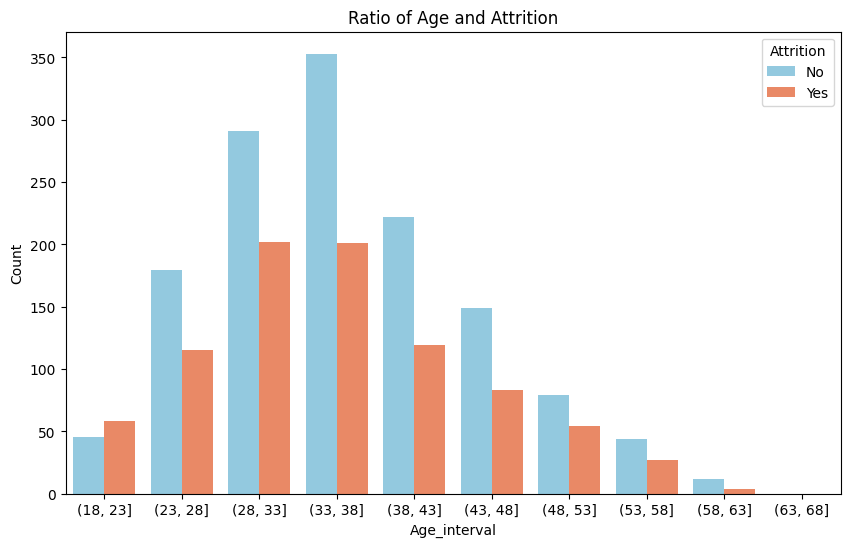

In [47]:
# Create barplot for grouped data
plt.figure(figsize=(10,6))
sns.barplot(data=da,x='Age_interval',y='Count',hue="Attrition", palette = ['skyblue', 'coral'])
plt.title("Ratio of Age and Attrition")

Observation: With the experience gained, the amount of attrition increases, mainly for a group of middle-aged people.

<Axes: title={'center': 'Salary per Age'}, xlabel='MonthlyIncome', ylabel='Age'>

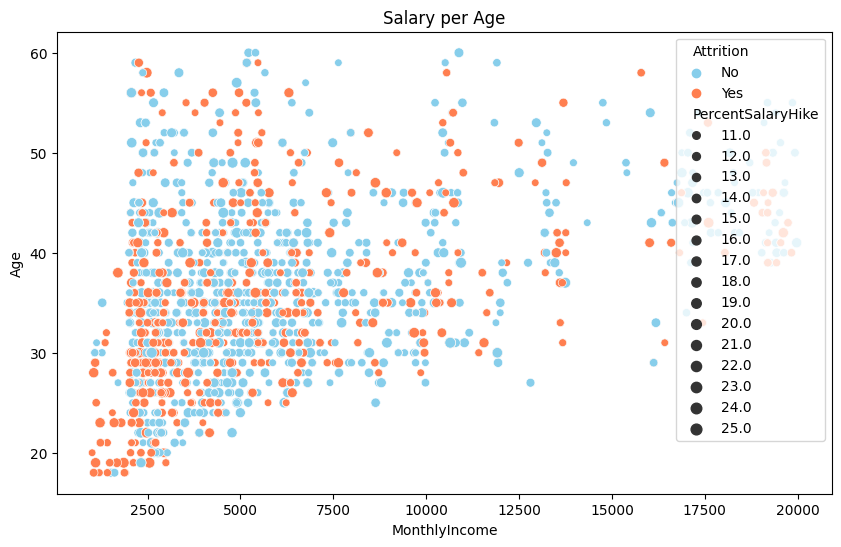

In [48]:
# Creating a scatterplot depending on Monthly Income, Age, Attrition, Percent SalaryHike
plt.figure(figsize=(10,6))
plt.title("Salary per Age")
sns.scatterplot(data=df,x="MonthlyIncome",y="Age",hue="Attrition", size="PercentSalaryHike",sizes=(30, 60), legend="full",palette=["skyblue","coral"])

Observation: The most attrition is visible at lower payouts, which is a normal phenomenon.

### Checking how education affects attrition

In [49]:
education_counts = df['EducationField'].value_counts()
education_list = education_counts.index.tolist()

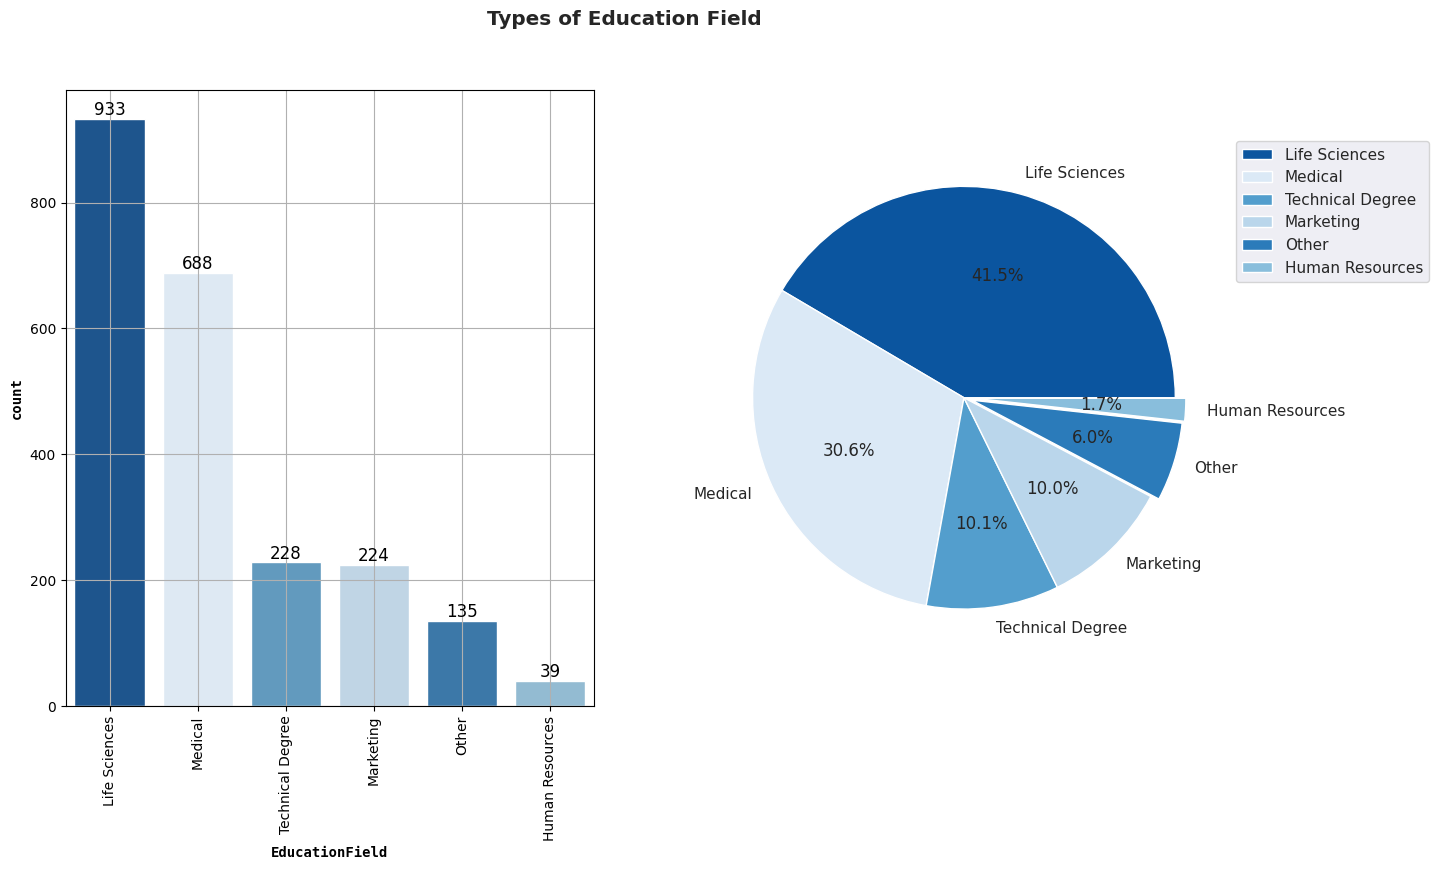

In [50]:
# check the data count and percentage ratio for EducationFiels on the chart
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['EducationField'].value_counts().index
y=df['EducationField'].value_counts().values.tolist()
data = df.groupby("EducationField").size()

sns.set(style="dark", color_codes=True)
pal = sns.color_palette("Blues", len(data))
rank = data.argsort().argsort()

# Create a barplot
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
# Assign values to bars
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

ax[0].set_xlabel('EducationField',weight='semibold', fontname = 'monospace')
ax[0].set_ylabel('count',weight='semibold', fontname = 'monospace')
ax[0].xaxis.set_tick_params(rotation=90)
ax[0].grid()

# Create a pie chart,
_, _, autotexts= ax[1].pie(y, labels = x, colors = np.array(pal[::-1])[rank], autopct='%1.1f%%',
        explode=(0,0,0,0,0.04,0.05))


plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of Education Field ',weight = 'bold')
plt.show()

Observation: Most employees work in the Life Sciences and Medical departments, fastest growing sectors.

In [51]:
df_education=df.groupby(['EducationField'])[['Attrition']].value_counts().reset_index()
df_education.set_axis(['EducationField','Attrition','Count'],axis='columns',inplace=True)

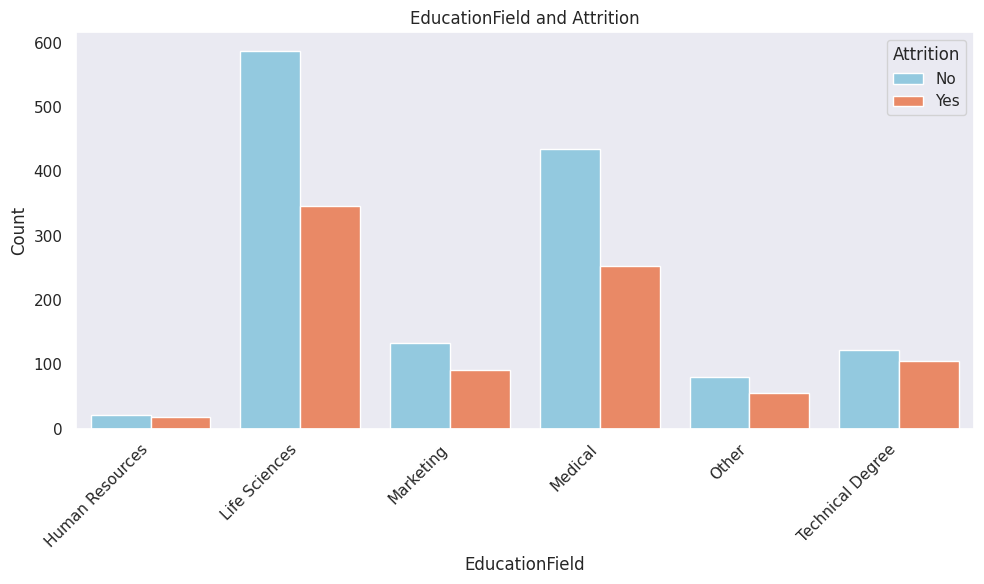

In [52]:
# Create a bar chart with Attrition
plt.figure(figsize=(10, 6))
sns.barplot(data=df_education, x='EducationField', y='Count', hue='Attrition', palette=['skyblue', 'coral'])
plt.title("EducationField and Attrition")
plt.xlabel("EducationField")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Attrition", loc='upper right')
plt.tight_layout()
plt.show()

Observation: Most people are being laid off in the fastest-growing departments.

In [53]:
# Plot the distribution of the target variable [Attrition].
fig = px.histogram(df, x="Attrition",title="Distribution of Attrition",color = "Attrition",width=800, height=400)
fig.update_layout(bargap=0.2, title_x=0.5, title_font=dict(size=20))
fig.show()

Observation: After removing the outliers there is a problem of unbalanced data that may affect the model generalizations

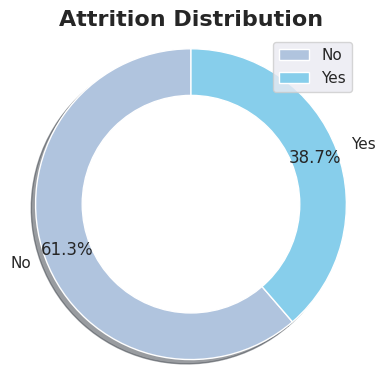

In [54]:
# The value counts of Attrition [%], create a pie chart
# Calculate the value counts of 'Attrition' column
attrition_counts = df['Attrition'].value_counts(normalize=True) * 100

labels = attrition_counts.index.tolist()
sizes = attrition_counts.values.tolist()

colors = ['lightsteelblue', 'skyblue']

fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True, pctdistance=0.85)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

ax.set_title('Attrition Distribution', fontsize=16, fontweight='bold')
plt.legend(labels, loc="upper right")

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()

# 5. Data Processing

In [55]:
# Transforms the values in the "Attrition",("No" and "Yes") to numerical values (0 and 1)
target_map = {"No" : 0, "Yes" : 1}

# the value is "No", it will be mapped to 0, and if it's "Yes", it will be mapped to 1.
df["Attrition"] = df["Attrition"].map(target_map)

## 5.1. One-hot encoding is a technique used to convert categorical variables into a binary (0 or 1) format

In [56]:
df_dum = pd.get_dummies(df)

In [57]:
df_dum.head()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,"Age_Interval_(18, 23]","Age_Interval_(23, 28]","Age_Interval_(28, 33]","Age_Interval_(33, 38]","Age_Interval_(38, 43]","Age_Interval_(43, 48]","Age_Interval_(48, 53]","Age_Interval_(53, 58]","Age_Interval_(58, 63]","Age_Interval_(63, 68]"
0,104,30.00,852.00,1.00,1.00,4.00,55.00,2.00,4.00,5126.00,...,0,0,1,0,0,0,0,0,0,0
1,1638,38.00,397.00,2.00,2.00,4.00,54.00,2.00,3.00,7756.00,...,0,0,0,1,0,0,0,0,0,0
2,164,26.00,841.00,6.00,3.00,3.00,46.00,2.00,2.00,2368.00,...,0,1,0,0,0,0,0,0,0,0
3,395,28.00,1117.00,8.00,2.00,4.00,66.00,3.00,4.00,3310.00,...,0,1,0,0,0,0,0,0,0,0
4,53,35.00,464.00,4.00,2.00,3.00,75.00,3.00,4.00,1951.00,...,0,0,0,1,0,0,0,0,0,0


We will further reduce the number of columns through feature importance

## 5.2. Feature Scaling

In [58]:
# prepare variable
y = df_dum['Attrition'] # the target variable
X = df_dum.drop(["Attrition"], axis = 1)  # the features excluding the target variable

In [59]:
# split data into train and test with an 8:2 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=111)

## Evaluation metrics

This code defines a function calculate_metrics that computes and prints various classification metrics based on the true labels y_test and the predicted labels y_pred. Here's an explanation of the metrics and their meanings:

**Accuracy:** Accuracy is the proportion of correctly predicted instances out of all instances. It provides a general view of the model's overall correctness.

**Precision:** Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. It focuses on minimizing false positives.

**Recall:** Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive instances out of all actual positive instances. It focuses on minimizing false negatives.

**F1-Score:** The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of a model's accuracy, considering both false positives and false negatives.

In [60]:
def calculate_metrics(y_test, y_pred):
    accuracy_test = accuracy_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred)
    recall_test = recall_score(y_test, y_pred)
    f1_score_test = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy_test:0.4f}")
    print(f"Precision: {precision_test:0.4f}")
    print(f"Recall: {recall_test:0.4f}")
    print(f"F1-score: {f1_score_test:0.4f}")

## Learning curve
* used  to understand how a model's performance changes as the amount of available training data increases. It is a valuable tool for analyzing the impact of data quantity on model quality and for addressing issues related to overfitting or underfitting.

In [61]:
def plot_learning_curve(estimator, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="skyblue")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="coral")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="skyblue", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="coral", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.title("Learning Curve")
    plt.grid(True)
    plt.show()

## 5.3. Feature selection

### DecisionTreeClassifier
* classification model based on a decision tree. A decision tree is a structure consisting of nodes that represent splits in the data based on feature values.
*  During the learning process, the model constructs the tree by partitioning data using the best features that maximize the separation between classes.


The model will be used only to extract the most important features.

In [62]:
# Define model
dt = DecisionTreeClassifier()

# Fit model
dt.fit(X_train, y_train)

# evaluation
y_pred_test = dt.predict(X_test)
y_pred_train = dt.predict(X_train)

In [63]:
print("Prediction for data train")
print("----------------------------")
calculate_metrics(y_pred_train, y_train)
print("                ")
print("                ")
print("Prediction for data test")
print("----------------------------")
calculate_metrics(y_pred_test, y_test)


Prediction for data train
----------------------------
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
                
                
Prediction for data test
----------------------------
Accuracy: 0.6622
Precision: 0.5355
Recall: 0.5939
F1-score: 0.5632


High results on the training set indicate overfitting, low results on the test set indicate the problem of model generalization, however, in further analysis, we will use more advanced models

In [64]:
# Feature importances

importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': dt.feature_importances_})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print(importances_df)

                       Feature  Importance
0               EmployeeNumber        0.46
2                    DailyRate        0.05
3             DistanceFromHome        0.05
9                MonthlyIncome        0.05
10                 MonthlyRate        0.04
..                         ...         ...
26  Department_Human Resources        0.00
23   BusinessTravel_Non-Travel        0.00
58       Age_Interval_(53, 58]        0.00
59       Age_Interval_(58, 63]        0.00
60       Age_Interval_(63, 68]        0.00

[61 rows x 2 columns]


* columns with a low importance index below 0.02 will be omitted, rest will be returned as Selected features below:

In [65]:
def select_features_by_importance(importance_df, threshold):
    selected_features = importance_df[importance_df['Importance'] >= threshold]['Feature'].tolist()
    return selected_features

threshold = 0.02
selected_features = select_features_by_importance(importances_df, threshold)

print("Selected features:")
print(selected_features)

Selected features:
['EmployeeNumber', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 'Age', 'HourlyRate', 'EnvironmentSatisfaction', 'YearsAtCompany', 'OverTime_No']


* Selecting columns of selected features for X_train, X_test
* We will also include columns with similar information like HourlyRate, MonthlyRate

In [66]:
selected_features = ['EmployeeNumber', 'DailyRate','MonthlyIncome', 'DistanceFromHome','Age', 'EnvironmentSatisfaction','OverTime_No', 'PercentSalaryHike']

In [67]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

## 5.4. Scaled data by MinMaxScaler
* all features will be transformed into the range [0,1]

In [68]:
scaler = MinMaxScaler()
scaler.fit(X_train)
# scale test and train data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6.Data Modeling

## 6.1. Logistic Regression with GridSearchCV
* the input features are linearly combined with weights, and then the logistic function transforms the result into a probability score. If the probability score is above a certain threshold (usually 0.5), the instance is predicted to belong to the positive class; otherwise, it's predicted to belong to the negative class.
*  GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered.


In [69]:
model = LogisticRegression(random_state = SEED, solver = "liblinear", class_weight='balanced')

# Finding the best model hyperparameters
parameters_grid_to_search = {
    "C": list(np.arange(0.75, 1.25, 0.5)), # regularization strength parameter
    "penalty" : ["l1", "l2"] # type of regularization
     }

searcher = GridSearchCV(estimator = model, param_grid = parameters_grid_to_search, cv = 5)

searcher.fit(X_train_scaled, y_train)

print(f"Best CV params {searcher.best_params_}")

# Retrieving the best model from GridSearchCV results
best_model = searcher.best_estimator_

# Predict values with the best model
y_scores = best_model.predict_proba(X_test_scaled)

Best CV params {'C': 0.75, 'penalty': 'l1'}


In [70]:
tsh = 0.5 # threshold line

y_pred_lr = np.where(y_scores[:, 1] > tsh, 1, 0)

In [71]:
calculate_metrics(y_test, y_pred_lr)

Accuracy: 0.7622
Precision: 0.6863
Recall: 0.7650
F1-score: 0.7235


### 6.1.1. Confusion matrix

#### The values in the confusion matrix represent:

* The top-left value is the number of True Negatives (TN).
* The top-right value is the number of False Positives (FP).
* The bottom-left value is the number of False Negatives (FN).
* The bottom-right value is the number of True Positives (TP).

[]

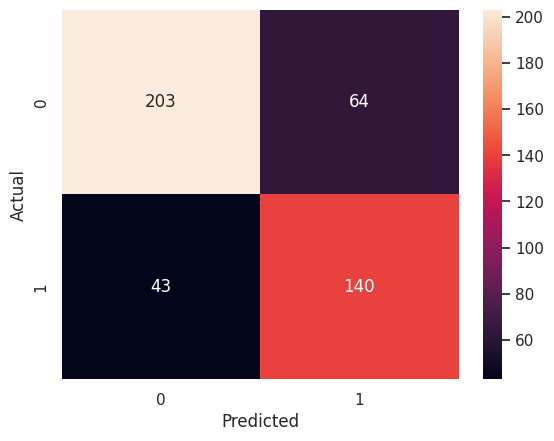

In [72]:
cm_plot = sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot = True, fmt='g')
cm_plot.set(xlabel = "Predicted", ylabel = "Actual")
cm_plot.plot()

### 6.1.2. Roc Curve
* Curve and the Area Under the Curve (AUC) are used to evaluate the performance of binary classification models. They help in understanding a model's ability to discriminate between two classes at different probability thresholds

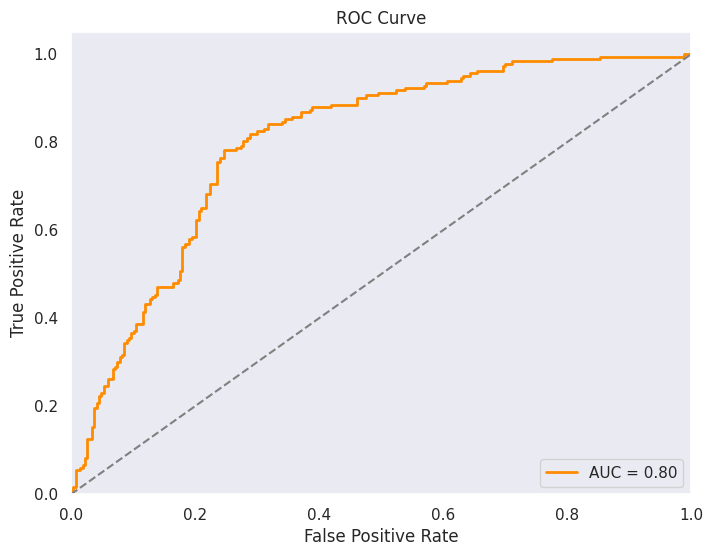

In [73]:
# Calculate ROC curve and AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])
roc_auc = roc_auc_score(y_test, y_scores[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

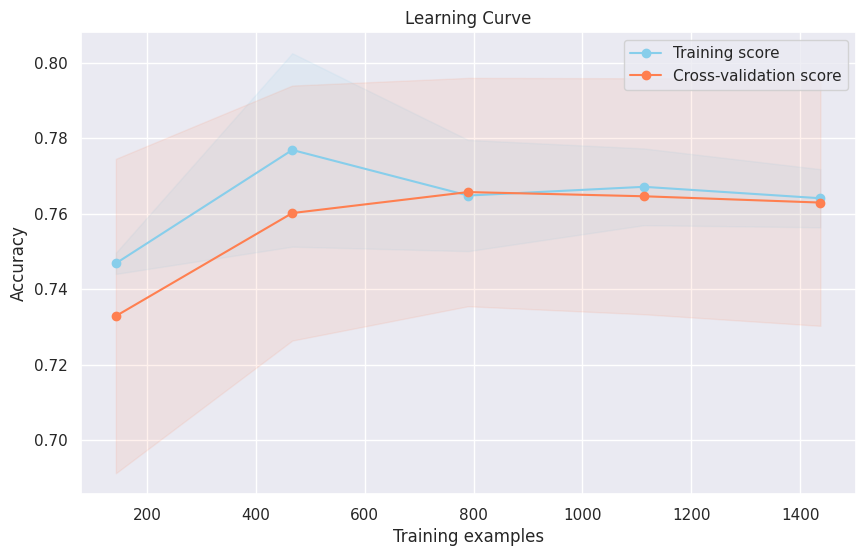

In [74]:
plot_learning_curve(best_model, X_train_scaled, y_train, cv=5)

observation:
* No Overfitting: The proximity of the curves suggests that the model is not overfitting the training data. It means the model generalizes well to unseen data, which is a positive outcome.

* A Sufficient Training Set Size: The closeness of the curves may suggest that the size of the training dataset is sufficient for the model to learn effectively. Adding more training data might not significantly improve model performance.

* Well-Tuned Hyperparameters: The model may have been well-tuned with appropriate hyperparameters, allowing it to effectively learn from the available data.

* No Data Issues: The proximity of the curves can also indicate that the training data is clean and does not contain significant errors or anomalies.

Conclusion:
* Accuracy: Around 76.22% of the predictions made by the model were correct.

* Precision: The precision of approximately 68.63%,m odel has a moderate level of precision in identifying true positives.

* Recall: the model is able to correctly identify about 76.50% of all actual positive instances.

* F1-score: The F1-score, which combines precision and recall, is approximately 72.35%. It provides a balance between precision and recall, making it a useful metric for models when both false positives and false negatives are important.

* AUC (Area Under the ROC Curve): The AUC value of 0.80 indicates that the model's ability to distinguish between positive and negative classes is fairly good.

In summary, the provided results suggest that the linear logistic regression model has decent performance, with good accuracy and AUC.

* Check the results for more complex models.

## 6.2. LazyClassifier
* is a Python library that simplifies the process of testing and evaluating multiple machine learning models on a dataset. It is designed to provide a quick overview of how various algorithms perform on your data without requiring you to manually implement each algorithm separately. LazyClassifier automates the model training and evaluation process, allowing you to get a sense of the baseline performance of different algorithms with minimal code.

In [75]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)
models

100%|██████████| 29/29 [00:03<00:00,  9.37it/s]

[LightGBM] [Info] Number of positive: 686, number of negative: 1111
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 1797, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381747 -> initscore=-0.482138
[LightGBM] [Info] Start training from score -0.482138


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NuSVC,0.76,0.76,0.76,0.76,0.21
BernoulliNB,0.76,0.76,0.76,0.76,0.02
NearestCentroid,0.76,0.75,0.75,0.76,0.02
SVC,0.75,0.75,0.75,0.75,0.18
QuadraticDiscriminantAnalysis,0.75,0.74,0.74,0.75,0.02
SGDClassifier,0.74,0.74,0.74,0.74,0.03
AdaBoostClassifier,0.74,0.73,0.73,0.74,0.22
LinearDiscriminantAnalysis,0.74,0.73,0.73,0.74,0.05
KNeighborsClassifier,0.74,0.72,0.72,0.73,0.04


Observation: the results are sorted from the best, we will choose the best two for further modeling: BernoulliNB, SVC.

## 6.3. The Support Vector Classifier (SVC)
It finds the best possible line or curve (hyperplane) that separates data points of different classes in a way that maximizes the margin between them. SVM can handle linearly separable data and, through kernel functions, can also work with non-linear data by transforming it into a higher-dimensional space.

In [98]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.5, 0.8, 1, 5, 10], # Regularization parameter
    'kernel': ['rbf'],  # Kernel type
    'degree': [2, 3, 4] # Degree for polynomial kernel
}

# Create the SVC model
model = SVC(random_state=SEED, class_weight='balanced', probability=True)

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model using GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator (model)
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_SVM = best_model.predict(X_test_scaled)
y_train_SVM = best_model.predict(X_train_scaled)

Best Parameters: {'C': 0.8, 'degree': 2, 'kernel': 'rbf'}


In [99]:
print("Prediction for data train")
print("----------------------------")
calculate_metrics(y_train, y_train_SVM)
print("                ")
print("                ")
print("Prediction for data test")
print("----------------------------")
calculate_metrics(y_test, y_pred_SVM)

Prediction for data train
----------------------------
Accuracy: 0.7791
Precision: 0.6659
Recall: 0.8455
F1-score: 0.7450
                
                
Prediction for data test
----------------------------
Accuracy: 0.7556
Precision: 0.6594
Recall: 0.8251
F1-score: 0.7330


### 6.3.1. Confusion matrix

[]

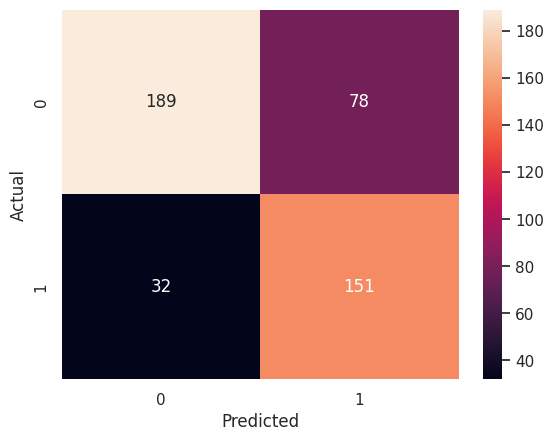

In [78]:
cm_plot = sns.heatmap(confusion_matrix(y_test, y_pred_SVM), annot = True, fmt='g')
cm_plot.set(xlabel = "Predicted", ylabel = "Actual")
cm_plot.plot()

Observation:
 * The model correctly classified 189 instances as "Negative"  and 151 instances as "Positive".

* However, it made 78 false positive errors, where it incorrectly classified negative instances as positive.

* It also made 32 false negative errors, where it incorrectly classified positive instances as negative.

### 6.3.2. Roc Curve

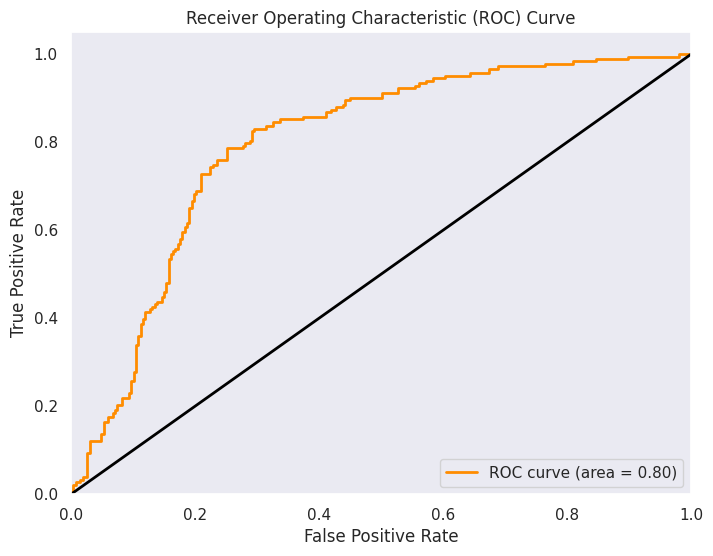

In [79]:
# Calculate probabilities for classes
y_prob_SVM = best_model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_SVM)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = roc_auc_score(y_test, y_prob_SVM)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

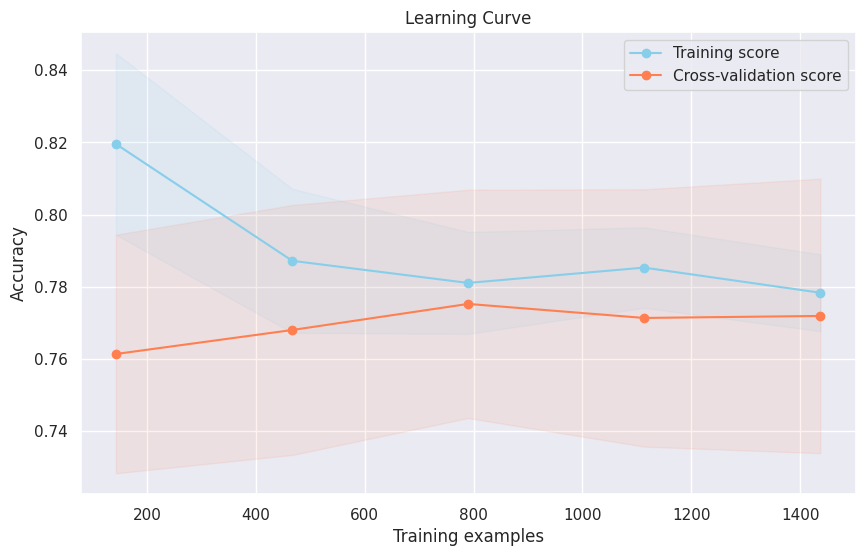

In [80]:
plot_learning_curve(best_model, X_train_scaled, y_train, cv=5)

Observations:
* The model performs a little worse on the test data, which may indicate that this model may need to work on optimizing hyperparameters, gathering more training data, or modifying the model architecture.

In summary:
*  these results indicate that the Support Vector Classifier (SVC) performs reasonably well in terms of accuracy, precision, recall, and F1-score on both the training and test datasets. The AUC value of 0.80 suggests that the model has a good ability to discriminate between the two classes.

## 6.4. Bernoulli Naive Bayes (BernoulliNB)
* Bayesian classification algorithm commonly used for binary classification problems where the outcome variables are binary (e.g., 0 or 1, False or True). It is one of the variations of the Naive Bayes algorithm, which assumes that the independent variables are binary.

In [81]:
# Creating a BernoulliNB model
base_model = BernoulliNB()

# Defining the hyperparameter grid for search
param_grid = {
    'alpha': [0.01, 0.02, 0.009, 1],  # Alpha parameter for BernoulliNB
    'binarize': [None, 0.4, 0.45, 0.35, 0],  # Binarize parameter
    'fit_prior': [True, False]  # Fit_prior parameter
}

# Initializing the hyperparameter tuning process using cross-validation
grid_search = GridSearchCV(estimator=base_model,
                           param_grid=param_grid,
                           scoring='accuracy',  # Choose an appropriate metric
                           cv=5,
                           verbose=-1  # Add verbosity to monitor progress
                           )

# Training the model on the searched hyperparameter space
grid_search.fit(X_train_scaled, y_train)

# Best found parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Training the model with the best parameters on the full training set
best_model = BernoulliNB(**best_params)
best_model.fit(X_train_scaled, y_train)

# Making predictions on the test data
y_pred_BernoulliNB = best_model.predict(X_test_scaled)
y_train_BernoulliNB = best_model.predict(X_train_scaled)

Best Parameters: {'alpha': 0.01, 'binarize': 0.4, 'fit_prior': True}


In [82]:
print("Prediction for data train")
print("----------------------------")
calculate_metrics(y_train, y_train_BernoulliNB)
print("                ")
print("                ")
print("Prediction for data test")
print("----------------------------")
calculate_metrics(y_test, y_pred_BernoulliNB)

Prediction for data train
----------------------------
Accuracy: 0.7652
Precision: 0.6697
Recall: 0.7595
F1-score: 0.7117
                
                
Prediction for data test
----------------------------
Accuracy: 0.7600
Precision: 0.6829
Recall: 0.7650
F1-score: 0.7216


### 6.4.1. Confusion matrix

[]

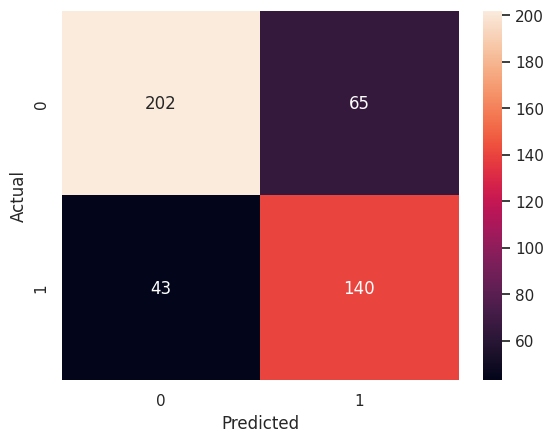

In [83]:
cm_plot = sns.heatmap(confusion_matrix(y_test, y_pred_BernoulliNB), annot = True, fmt='g')
cm_plot.set(xlabel = "Predicted", ylabel = "Actual")
cm_plot.plot()

Observation:
* The model correctly classified 202 instances as "Negative" and 140 instances as "Positive."

* However, it made 65 false positive errors, where it incorrectly classified negative instances as positive.

* It also made 43 false negative errors, where it incorrectly classified positive instances as negative.

### 6.4.2. Roc Curve

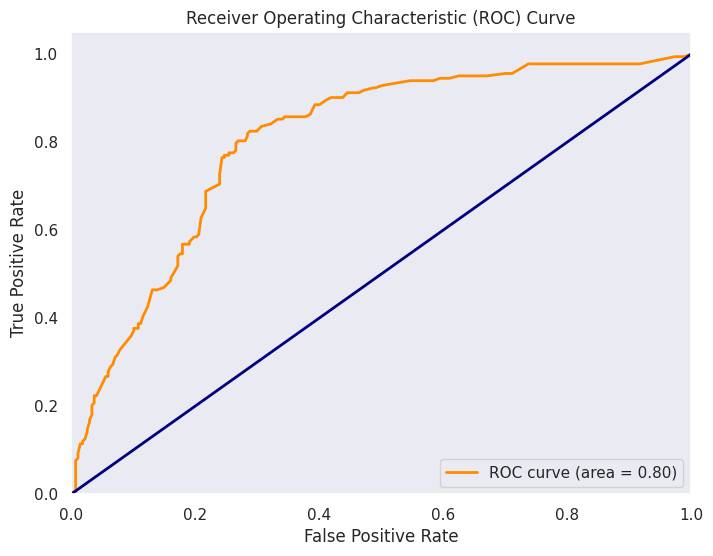

In [84]:
# Calculate probabilities for the positive class
y_prob_BernoulliNB = best_model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_BernoulliNB)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = roc_auc_score(y_test, y_prob_BernoulliNB)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

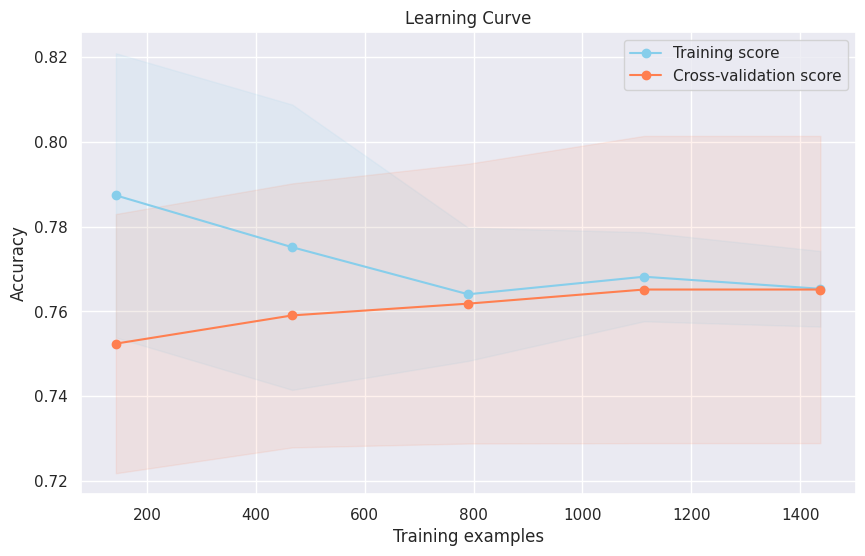

In [85]:
plot_learning_curve(best_model, X_train_scaled, y_train, cv=5)

observation:
* No Overfitting: The proximity of the curves suggests that the model is not overfitting the training data. It means the model generalizes well to unseen data, which is a positive outcome.

* A Sufficient Training Set Size: The closeness of the curves may suggest that the size of the training dataset is sufficient for the model to learn effectively. Adding more training data might not significantly improve model performance.

* Well-Tuned Hyperparameters: The model may have been well-tuned with appropriate hyperparameters, allowing it to effectively learn from the available data.

* No Data Issues: The proximity of the curves can also indicate that the training data is clean and does not contain significant errors or anomalies.

Summary:
* these results suggest that the Bernoulli Naive Bayes (BernoulliNB) classifier performs reasonably well in terms of accuracy, precision, recall, and F1-score on both the training and test datasets. The AUC value of 0.80 indicates that the model has good discriminative capability.

# 7. Project Summary:

In this project, we conducted a comprehensive analysis using various machine learning models on a dataset with the goal of making accurate classifications. We evaluated the performance of three distinct models: Logistic Regression, Support Vector Classifier (SVC), and Bernoulli Naive Bayes (BernoulliNB) on the test data.

Here are the key results for each model:

**Logistic Regression:**

Accuracy: 76.22%
Precision: 68.63%
Recall: 76.50%
F1-score: 72.35%

**Support Vector Classifier (SVC):**

Accuracy: 75.56%
Precision: 65.94%
Recall: 82.51%
F1-score: 73.30%

**Bernoulli Naive Bayes (BernoulliNB):**

Accuracy: 76.00%
Precision: 68.29%
Recall: 76.50%
F1-score: 72.16%

These results indicate that all three models performed reasonably well in classifying the data, with Logistic Regression achieving the highest accuracy and F1-score. However, the Support Vector Classifier demonstrated a high recall, making it particularly effective at identifying positive cases.

In summary, the choice of the best model may depend on the specific goals and priorities of the project. Logistic Regression excels in overall accuracy, while the Support Vector Classifier is strong in recall, and Bernoulli Naive Bayes offers a balanced performance. Further analysis and domain expertise may be necessary to determine the most suitable model for the given problem.